In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Exploration des données titanic.csv


## Lecture des données 

In [3]:
data=pd.read_csv("titanic.csv")

In [25]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Description des colonnes:
* PassengerId: numero du voyageur (Id)
* suvived: nombre des survécus
* pclass: classe des voyageurs(1,2,3,...)
* sex: sexe des voyageurs (female,male)
* age: age des voyageurs
* sibsp: nombre de frère et soeur
* parch: nombre de personne déssécher
* fare: prix du ticket(tarif)
* Embarked: Queue d'embarquement
* Ticket: Numero de ticket
* Cabin: numero de cabine

## Statistiques descriptives

In [26]:
data.value_counts()

PassengerId  Survived  Pclass  Name                                                  Sex     Age   SibSp  Parch  Ticket    Fare      Cabin  Embarked
2            1         1       Cumings, Mrs. John Bradley (Florence Briggs Thayer)   female  38.0  1      0      PC 17599  71.2833   C85    C           1
572          1         1       Appleton, Mrs. Edward Dale (Charlotte Lamson)         female  53.0  2      0      11769     51.4792   C101   S           1
578          1         1       Silvey, Mrs. William Baird (Alice Munger)             female  39.0  1      0      13507     55.9000   E44    S           1
582          1         1       Thayer, Mrs. John Borland (Marian Longstreth Morris)  female  39.0  1      1      17421     110.8833  C68    C           1
584          0         1       Ross, Mr. John Hugo                                   male    36.0  0      0      13049     40.1250   A10    C           1
                                                                                 

In [70]:
data['PassengerId'].value_counts()

1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: PassengerId, Length: 891, dtype: int64

* il y a 891 voyageurs dans titanic 

In [88]:
data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [66]:
sex=data.groupby("Sex").sum()
sex['Survived']

Sex
female    233
male      109
Name: Survived, dtype: int64

In [68]:
age=data.groupby("Age").sum()
age[age['Survived']>=1]

,PassengerId,Survived,Pclass,SibSp,Parch,Fare
Age,,,,,,
0.42,804,1,3,0,1,8.5167
0.67,756,1,2,1,1,14.5000
0.75,1115,2,6,4,2,38.5166
0.83,911,2,4,1,3,47.7500
0.92,306,1,1,1,2,151.5500
...,...,...,...,...,...,...
58.00,1625,3,5,0,3,469.5083
60.00,2335,2,5,3,2,220.0000
62.00,2210,2,5,0,0,143.6000


* Parmi les 891 voygeurs 342 ont survécus dont 233 femmmes et 109 hommes agées de 0.42 à 80 ans

In [108]:
péri=data[data['Survived']==0]

In [112]:
sexp=péri.groupby("Sex")
sexp['Survived'].value_counts()

Sex     Survived
female  0            81
male    0           468
Name: Survived, dtype: int64

In [109]:
agep=péri.groupby("Age").sum()
agep

,PassengerId,Survived,Pclass,SibSp,Parch,Fare
Age,,,,,,
1.0,552,0,6,9,3,86.5875
2.0,2117,0,19,19,10,311.0750
3.0,375,0,3,3,1,21.0750
4.0,1087,0,9,11,5,88.3000
6.0,814,0,3,4,2,31.2750
...,...,...,...,...,...,...
66.0,34,0,2,0,0,10.5000
70.0,1419,0,3,1,1,81.5000
70.5,117,0,3,0,0,7.7500


* Parmi les 891 voygeurs 549 sont déclarés morts dont 81 femmmes et 468 hommes agées de 1 à 74 ans

In [27]:
data.mean()

PassengerId    446.000000
Survived         0.383838
Pclass           2.308642
Age             29.699118
SibSp            0.523008
Parch            0.381594
Fare            32.204208
dtype: float64

In [33]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


* count: il y a 891 enregistrements , et 177 Age non enregistrés
* mean : les moyennes de Survived et Parch sont sensiblement égaux
* std : standar variation
* min : le minimum d'age est 0.42000 an et le minimum de tarif est 0.000000
* 25% : Pclass=2,Age=20,Fare=7.910400
* 50% : Pclass=3,Age=28,Fare=14.454200
* 75% : Survived,Pclass=3,Age=38,Sibsp=1,Fare=31
* max : nombre de voyageur=891 car min PassengerId=1,le maximum d'age est 80 ans,max Sibsp=8,max Fare= 512.3292

## Corelation

In [113]:
cor=data.corr()

<AxesSubplot:>

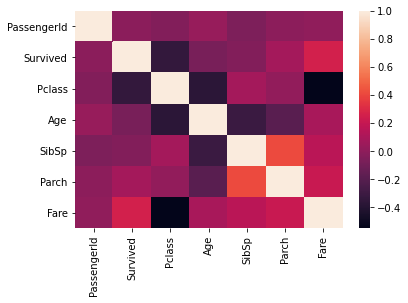

In [114]:
sns.heatmap(cor)

* cor1:Parch et Sbsp sont positivement corelé
* cor2: Fare et Pclass sont négativement corelé

## Visualisation

<AxesSubplot:xlabel='Age', ylabel='Survived'>

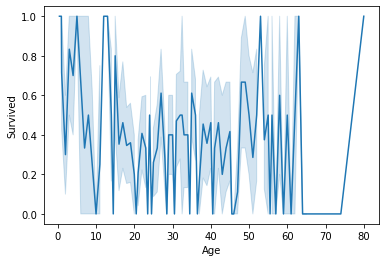

In [31]:
sns.lineplot(x="Age",y="Survived",data=data)

* [0-15] ans : il y en a beaucoup plus de survivant que des morts
* [16-50] ans : il y en a moins de survivant 
* [51-80] ans : il y en a beaucoup  de survivant

<AxesSubplot:xlabel='Age', ylabel='Sex'>

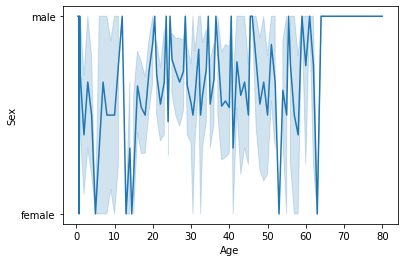

In [117]:
sns.lineplot(x="Age",y="Sex",data=data)

* [0-15] ans : male et female sont sensiblement égaux
* [16-50] ans :  male est beaucoup plus nombreux 
* [51-65] ans : male et female sont sensiblement égaux
* [66-80] ans :  male 

<AxesSubplot:xlabel='Age', ylabel='Fare'>

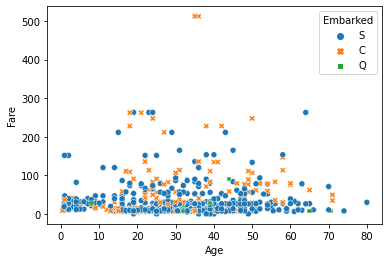

In [126]:
sns.scatterplot(x="Age",y="Fare",hue="Embarked",style="Embarked",data=data)

### Fare:
* [0-100]: tous les tranches d'age ont pris les tarifs,embarqués par le queue S,C et Q
* [101-200]: moins de 70 ans ,embarqués par le queue S et C
* [201-300]: moins de 70 ans et plus de 10 ans ,embarqués par le queue S et C
* [301-600]: moins de 40 ans et plus de 30 ans ,embarqués par le queue C

<AxesSubplot:xlabel='Sex', ylabel='Age'>

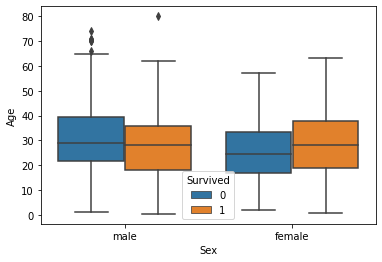

In [118]:
sns.boxplot(x="Sex",y="Age",hue="Survived",data=data)

* homme survivant:moins de 30 ans
* femme survivante:plus de 20 ans 

<AxesSubplot:xlabel='Age', ylabel='Fare'>

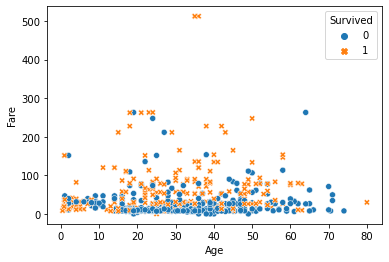

In [128]:
sns.scatterplot(x="Age",y="Fare",hue="Survived",style="Survived",data=data)

* la plus part des non-survivants ont payés moins de 100

<AxesSubplot:xlabel='Age', ylabel='Survived'>

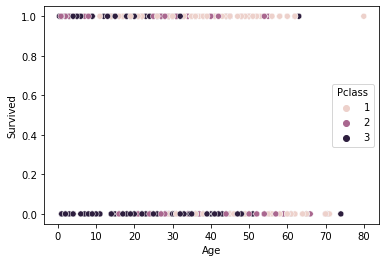

In [130]:
sns.scatterplot(x="Age",y="Survived",hue="Pclass",data=data)

<AxesSubplot:xlabel='Age', ylabel='SibSp'>

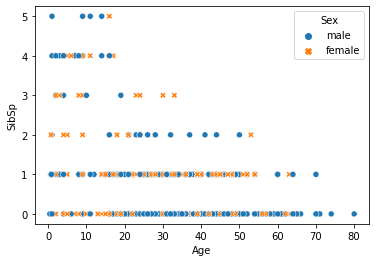

In [123]:
sns.scatterplot(x="Age",y="SibSp",hue="Sex",style="Sex",data=data)

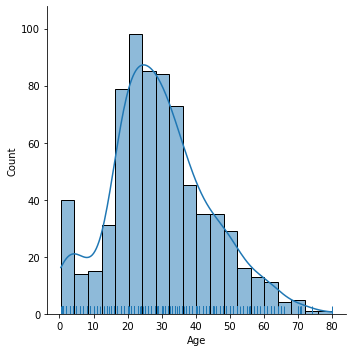

In [5]:
sns.displot(data=data,x="Age",kde=True,rug=True)

* la plus part des voyageurs ont 10 à 60 ans

<AxesSubplot:xlabel='SibSp', ylabel='Fare'>

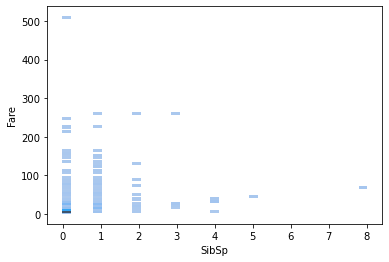

In [11]:
sns.histplot(data=data,y="Fare",x="SibSp")

* plus le nombre de SibSp augmente plus le tarif (Fare) diminue 

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

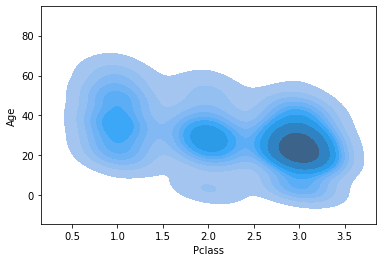

In [23]:
sns.kdeplot(data=data,x="Pclass",y="Age",fill=True)

* plus l'age augmente plus le class(Pclass) diminue

<AxesSubplot:xlabel='Age', ylabel='Count'>

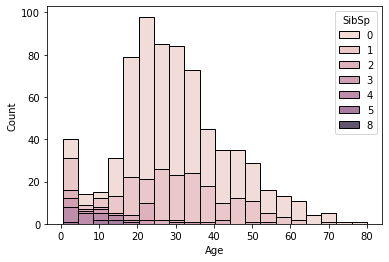

In [25]:
sns.histplot(data,x='Age',hue="SibSp",multiple="stack")

* les voyageurs agés de moins 20 ans ont plus de SibSp que  les autres  

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

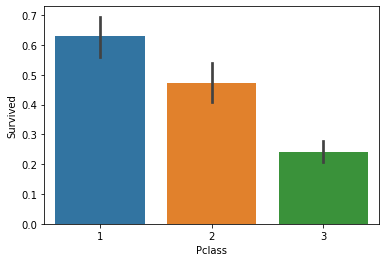

In [36]:
sns.barplot(data=data,x="Pclass",y="Survived")

* les voyageurs de class 1 sont beaucoup de survivant que la class 2 et les voyageurs de class 3 sont beaucoup à ne pas survivre

<AxesSubplot:xlabel='SibSp', ylabel='Density'>

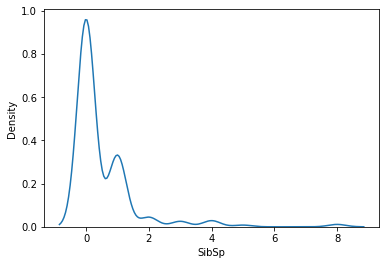

In [37]:
sns.kdeplot(data=data,x='SibSp',bw_adjust=1)

* la plus part des voyageurs ne voyagent pas en famille

## Autres Informations:

In [174]:
data[data.Name.str.split(',').apply(lambda x : "Goldenberg" in x[0])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NameSp,Namefamily
453,454,1,1,"Goldenberg, Mr. Samuel L",male,49.0,1,0,17453,89.1042,C92,C,"[Goldenberg, Mr. Samuel L]",Goldenberg
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,NaN,1,0,17453,89.1042,C92,C,"[Goldenberg, Mrs. Samuel L (Edwiga Grabowska)]",Goldenberg


* Pour trouver les personnes de meme famille ou mariés , on fait une recherche par nom de famille

In [87]:
data["NameSp"]=data.Name.str.split(',')
dt2=data["NameSp"].values.reshape((891,1))

In [144]:
data["Namefamily"]=[l[0][0] for l in dt2]

In [145]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NameSp,Namefamily
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"[Braund, Mr. Owen Harris]",Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"[Cumings, Mrs. John Bradley (Florence Briggs ...",Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"[Heikkinen, Miss. Laina]",Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"[Futrelle, Mrs. Jacques Heath (Lily May Peel)]",Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"[Allen, Mr. William Henry]",Allen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,"[Montvila, Rev. Juozas]",Montvila
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,"[Graham, Miss. Margaret Edith]",Graham
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,"[Johnston, Miss. Catherine Helen ""Carrie""]",Johnston
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,"[Behr, Mr. Karl Howell]",Behr


* Création du colonne Namefamily pour les noms de famille

In [188]:
dt3=data.groupby("Namefamily").count()[data.groupby("Namefamily")["Sex"].nunique()==2]
dt4=dt3[dt3["Cabin"]==2]
dt4

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NameSp
Namefamily,,,,,,,,,,,,,
Andrews,2,2,2,2,2,2,2,2,2,2,2,2,2
Baxter,2,2,2,2,2,2,2,2,2,2,2,2,2
Becker,2,2,2,2,2,2,2,2,2,2,2,2,2
Beckwith,2,2,2,2,2,2,2,2,2,2,2,2,2
Bishop,2,2,2,2,2,2,2,2,2,2,2,2,2
Brown,4,4,4,4,4,4,4,4,4,4,2,4,4
Chambers,2,2,2,2,2,2,2,2,2,2,2,2,2
Crosby,2,2,2,2,2,2,2,2,2,2,2,2,2
Dick,2,2,2,2,2,2,2,2,2,2,2,2,2


* liste des personnes dans le meme cabine et de sexe différent

In [189]:
data[data.NameSp.apply(lambda x : x[0] in dt4.index)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NameSp,Namefamily
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"[Futrelle, Mrs. Jacques Heath (Lily May Peel)]",Futrelle
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C,"[Harper, Mrs. Henry Sleeper (Myna Haxtun)]",Harper
62,63,0,1,"Harris, Mr. Henry Birkhardt",male,45.0,1,0,36973,83.4750,C83,S,"[Harris, Mr. Henry Birkhardt]",Harris
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C,"[Baxter, Mr. Quigg Edmond]",Baxter
137,138,0,1,"Futrelle, Mr. Jacques Heath",male,37.0,1,0,113803,53.1000,C123,S,"[Futrelle, Mr. Jacques Heath]",Futrelle
151,152,1,1,"Pears, Mrs. Thomas (Edith Wearne)",female,22.0,1,0,113776,66.6000,C2,S,"[Pears, Mrs. Thomas (Edith Wearne)]",Pears
174,175,0,1,"Smith, Mr. James Clinch",male,56.0,0,0,17764,30.6958,A7,C,"[Smith, Mr. James Clinch]",Smith
183,184,1,2,"Becker, Master. Richard F",male,1.0,2,1,230136,39.0000,F4,S,"[Becker, Master. Richard F]",Becker
194,195,1,1,"Brown, Mrs. James Joseph (Margaret Tobin)",female,44.0,0,0,PC 17610,27.7208,B4,C,"[Brown, Mrs. James Joseph (Margaret Tobin)]",Brown
219,220,0,2,"Harris, Mr. Walter",male,30.0,0,0,W/C 14208,10.5000,NaN,S,"[Harris, Mr. Walter]",Harris


* liste des voyageurs ensemble qui sont mariés 